# 4 PID Control

## References

Karl J. Astrom and Richard Murray (2016). _Feedback Systems: An Introduction for Scientists and Engineers, 2nd Edition_.  [Web version available]( http://www.cds.caltech.edu/~murray/amwiki/index.php/Second_Edition).

## PID Simulation

In [17]:
!pip install slycot
!pip install control

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control

# control constants
Kc = 0.85
tauI = 10000

# control transfer function
Gc = Kc*control.tf([tauI,1],[tauI,0])

# model transfer functions
Gp = control.tf([0.85],[30,1])*control.tf([1],[142,1])

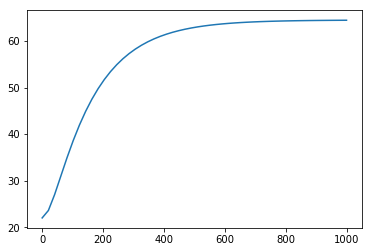

In [24]:
Gct = np.linspace(0,1000)
y,t = control.step(Gp,t)
plt.plot(t,50*y + 22)

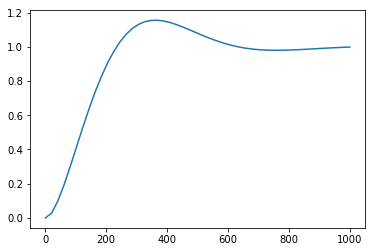

In [25]:
# control constants
Kc = 0.8
tauI = 60

# control transfer function
Gc = Kc*control.tf([tauI,1],[tauI,0])

t = np.linspace(0,1000)

H = Gp*Gc/(1+Gp*Gc)
y,t = control.step(H,t)
plt.plot(t,y)

## PID Implementation

### Reference Conditions

One of the implementation issues for PID control of the Temperature Control Lab is choice of reference conditions. One reason is that the linearization on which PID analysis is based is only valid in some 'neighborhood' of a nominal operating condition. But perhaps a more typical situation in most practical 

In [15]:
%matplotlib inline

import sys
sys.path.append('..')
from TCLab import TCLab, clock, pid

# ambient and reference values
Tamb = 20
Tref = 50
uref = (Tref - Tamb)/0.85

# control parameters
b = 1              # setpoint weighting
kp = 0.8          # proportional control gain
ki = kp/60

# sampling period
tf = 1200           # experiment length (sec.)
h = 1               # sample time (sec.)

# setpoint function
def Tset(t):
    if t <= 1000:
        return 60
    else:
        return 40


bi = ki*h

r = Tset(0) - Tref
y = Tamb - Tref

P = kp*(b*r - y)
I = 0

uref,P,I,r

(35.294117647058826, 32.0, 0, 10)

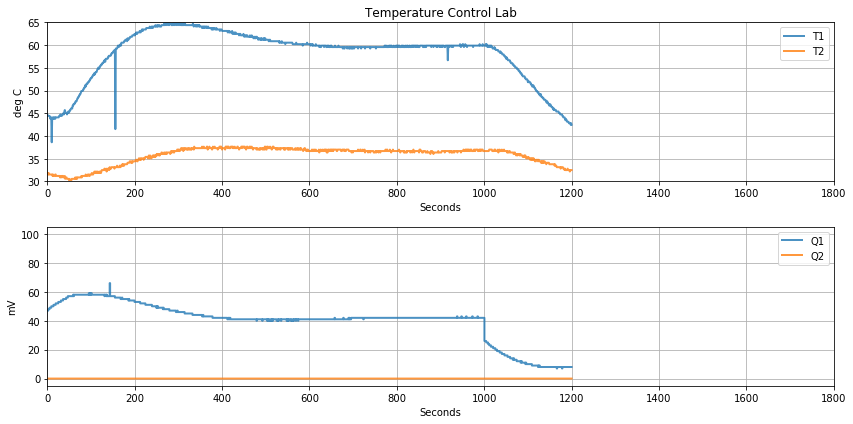

'Stop'

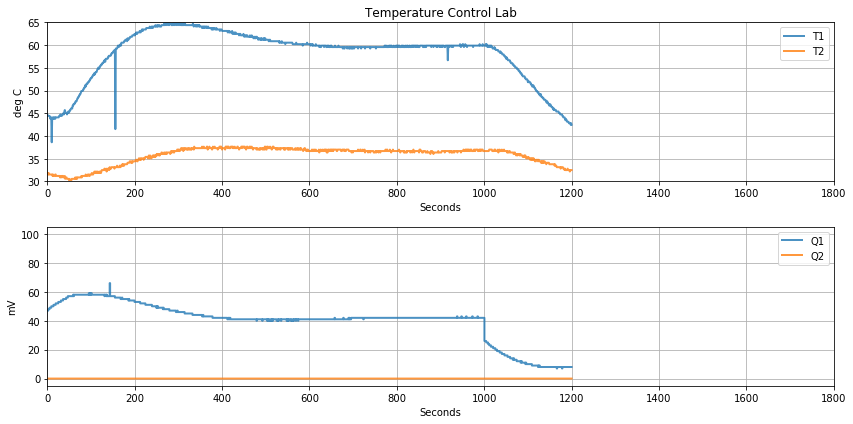

In [16]:
# device initialization
a = TCLab()
a.initplot(tf)
a.start()

for t in clock(tf,h):
    r = Tset(t) - Tref
    y = a.T1 - Tref
    
    P = kp*(b*r - y)
    v = P + I
    
    u = max(0,min(100,v + uref))
    I += bi*(r-y)
    
    a.Q1 = u
    a.updateplot()
        
a.stop()

In [4]:
a.stop()

'Stop'